In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metro_df = pd.read_csv('..\data\Metro_Nashville_Police_Department_Incidents_20240511.csv')

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_2992\3944827326.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  metro_df = pd.read_csv('..\data\Metro_Nashville_Police_Department_Incidents_20240511.csv')


In [3]:
metro_df.head()

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,7/1/2019 17:31,7/1/2019 18:17,2410 2410,...,NONE,1.0,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,3/31/2018 12:21,3/31/2018 19:41,5824 5824,...,NONE,1.0,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,4/6/2020 11:15,4/6/2020 13:11,3144 3144,...,NONE,1.0,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,5/29/2017 2:33,5/29/2017 4:27,1714 1714,...,NONE,1.0,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,12/16/2017 18:30,12/16/2017 22:44,1101 1101,...,PERSONAL (HANDS),1.0,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)


In [4]:
metro_df['Incident Reported'] = pd.to_datetime(metro_df['Incident Reported'])

In [5]:
metro_df['Incident Occurred'] = pd.to_datetime(metro_df['Incident Occurred'])

In [6]:
metro_df.head(10)

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,2019-07-01 17:31:00,2019-07-01 18:17:00,2410 2410,...,NONE,1.0,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-03-31 12:21:00,2018-03-31 19:41:00,5824 5824,...,NONE,1.0,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-06 11:15:00,2020-04-06 13:11:00,3144 3144,...,NONE,1.0,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,2017-05-29 02:33:00,2017-05-29 04:27:00,1714 1714,...,NONE,1.0,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-12-16 18:30:00,2017-12-16 22:44:00,1101 1101,...,PERSONAL (HANDS),1.0,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)
5,20190792147_11,20190792147,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2019-10-28 12:00:00,2019-10-30 20:10:00,506 506,...,PERSONAL (HANDS),1.0,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.779 36.17)
6,20200019888_11,20200019888,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2020-01-09 15:35:00,2020-01-09 16:31:00,400 400,...,PERSONAL (HANDS),1.0,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,NON RESIDENT,POINT (-86.794 36.214)
7,20170069535_11,20170069535,D,DISPATCHED,U,UNFOUNDED,Closed,2017-01-22 09:00:00,2017-01-23 15:21:00,1700 1700,...,NONE,1.0,False,U,UNKNOWN,U,U,Unknown,NaN,POINT (-86.8 36.18)
8,20170051465_11,20170051465,D,DISPATCHED,U,UNFOUNDED,Closed,2017-01-17 12:00:00,2017-01-17 21:17:00,124 124,...,NONE,1.0,False,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,POINT (-86.665 36.06)
9,20200532326_11,20200532326,T,NaN,O,OPEN,Open,2019-12-15 15:00:00,2020-08-18 09:34:00,HILLSBORO PIKE,...,NONE,1.0,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.82 36.1)


In [7]:
#gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)
metro_df.rename(columns ={'Victim Race': 'victim_race'}, inplace = True)

In [8]:
#gdp_df.value_counts('Country')
sort_race = metro_df.value_counts('victim_race')
sort_race.reset_index()


,victim_race,count
0,W,262292
1,B,175499
2,U,32851
3,A,5280
4,O,1398
5,I,569
6,P,185
7,H,39
8,3,4
9,T,3


In [9]:
# gourd_types = {
#     "F": "Field Pumpkin",
#     "P": "Giant Pumpkin",
#     "S": "Giant Squash",
#     "W": "Giant Watermelon",
#     "T": "Tomato",
#     "L": "Long Gourd"
# }
# gourds['Type']= gourds['Type'].astype(str).replace(gourd_types)
# gourds

race = {
    'A': 'ASIAN', 
    'B': 'BLACK OR AFRICAN AMERICAN', 
    'H': 'HISPANIC', 
    'I': 'AMERICAN INDIAN OR ALASKA NATIVE',  
    'P': 'NATIVE HAWAIIAN OR PACIFIC ISLANDER',
    'T': 'TWO OR MORE RACES', 
    'U': 'UNKNOWN',
    'W': 'WHITE' 
}
metro_df['victim_race'] = metro_df['victim_race'].astype(str).replace(race)
metro_df.head()

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,victim_race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,2019-07-01 17:31:00,2019-07-01 18:17:00,2410 2410,...,NONE,1.0,True,I,INDIVIDUAL (18 AND OVER),M,WHITE,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-03-31 12:21:00,2018-03-31 19:41:00,5824 5824,...,NONE,1.0,False,B,BUSINESS,NaN,nan,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-06 11:15:00,2020-04-06 13:11:00,3144 3144,...,NONE,1.0,False,G,GOVERNMENT,NaN,nan,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,2017-05-29 02:33:00,2017-05-29 04:27:00,1714 1714,...,NONE,1.0,False,I,INDIVIDUAL (18 AND OVER),M,WHITE,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-12-16 18:30:00,2017-12-16 22:44:00,1101 1101,...,PERSONAL (HANDS),1.0,True,I,INDIVIDUAL (18 AND OVER),F,BLACK OR AFRICAN AMERICAN,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)


In [10]:
#sns.barplot(data=heavy_types, x="Type", y="avg_weight", order=result['Type'])
# plt.xlabel('Gourds')
# plt.ylabel('Average Weight')
# plt.xticks(rotation=45, ha="right")


In [11]:
pd_killing_df = pd.read_excel('..\data\washington post police killing 2013 to 2023 MPVDatasetDownload.xlsx')

In [148]:
pd_killing_state = pd.read_excel('..\data\police_killings_by_state.xlsx')

In [13]:
pd_killing_dept = pd.read_excel('..\data\police_killings_by_dept.xlsx')

In [14]:
pd_killing_df.head()
pd.set_option('display.max_columns', None)

In [15]:
pd_killing_df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Devon Allen,25,Male,Black,NaN,2024-04-30,2024,200 W 24th St,New York City,NY,NaN,New York,New York Police Department,NY0303000,Gunshot,"25-year-old Devon Allen, was shot at least thr...",Pending investigation,No known charges,https://nypost.com/2024/04/30/us-news/suspect-...,No,Allegedly Armed,gun,other,brandished weapon,Foot,NaN,NaN,NaN,NaN,12968.0,NaN,Person with a Weapon,person with a gun,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Steven McClean,35,Male,Unknown race,NaN,2024-04-30,2024,501 King Philip St,Raynham,MA,NaN,Bristol,Raynham Police Department,MA0031400,Gunshot,Officers responded to the King Philip Street h...,Pending investigation,No known charges,https://www.necn.com/news/local/raynham-police...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,NaN,NaN,NaN,12969.0,NaN,Other Non-Violent Offense,"disorderly conduct, probation violation",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Jaevel Andrew Boulding,32,Male,Black,https://st1.uvnimg.com/dims4/default/fc163db/2...,2024-04-30,2024,1803 Vance Jackson Rd,San Antonio,TX,NaN,Bexar,San Antonio Police Department,TXSPD0000,Gunshot,Police said the shooting happened after office...,Pending investigation,No known charges,https://news4sanantonio.com/news/local/identif...,No,Allegedly Armed,gun,attack,used weapon,Not Fleeing,NaN,NaN,NaN,NaN,12975.0,NaN,Part 1 Violent Crime/Domestic Disturbance,"shooting, domestic violence, welfare check",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,Ja

In [16]:
#gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)

In [17]:
sample_df = pd_killing_state.head()

In [18]:
#sample_df.to_csv('sample_df.csv')

In [19]:
sample_df.to_csv('test.csv')

In [20]:
for i,data in sample_df.iterrows():
    print(data)

State Full                        Alabama
State                                  AL
Total Population                5024279.0
Black Population                1288159.0
Hispanic Population              264047.0
                                  ...    
2019 Killings per Population     2.665983
2020 Killings per Population     4.173404
2021 Killings per Population     4.950123
2022 Killings per Population     4.730086
2023 Killings per Population     6.459862
Name: 0, Length: 201, dtype: object
State Full                         Alaska
State                                  AK
Total Population                 733391.0
Black Population                  20731.0
Hispanic Population               49824.0
                                  ...    
2019 Killings per Population     9.497088
2020 Killings per Population    12.278911
2021 Killings per Population     9.524807
2022 Killings per Population     6.818715
2023 Killings per Population     9.544509
Name: 1, Length: 201, dtype: object
Stat

In [21]:
pd_killing_dept.head()

,State,City,PD,ORI,All People Killed by Police,Black People Killed by Police,Hispanic People Killed by Police,Native American People Killed by Police,Asian People Killed by Police,Pacific Islanders Killed by Police,White People Killed by Police,Unknown Race People Killed by Police,Allegedly Armed People Killed by Police,Unarmed/Did Not Have an Actual Weapon People Killed by Police,Unclear Armed Status People Killed by Police,People Armed with Vehicle Killed by Police,People killed by police 2013,People killed by police 2014,People killed by police 2015,People killed by police 2016,People killed by police 2017,People killed by police 2018,People killed by police 2019,People killed by police 2020,People killed by police 2021,People killed by police 2022,People killed by police 2023,People killed by police 2024,Total Population (Census 2020),Black,White,Amer. Indian,Asian,Hawaiian,Asian/Pacific Islander,Other,Two or\nmore races,Hispanic,Black-White Dissimilarity Index (2010),Avg Annual Police Homicide Rate,Avg Annual Police Homicide Rate for Black People,Avg Annual Police Homicide Rate for White People,Avg Annual Police Homicide Rate for Hispanic People,Avg Annual Police Homicide Rate for Native American People,Avg Annual Police Homicide Rate for Pacific Islanders,Avg Annual Police Homicide Rate for Asians,Black-White Disparity,Hispanic-White Disparity,Violent crimes 2013 (if reported by agency),Violent crimes 2014 (if reported by agency),Violent crimes 2015 (if reported by agency),Violent crimes 2016 (if reported by agency),Violent crimes 2017 (if reported by agency),Violent crimes 2018 (if reported by agency),Violent crimes 2019 (if reported by agency),Violent crimes 2020 (if reported by agency),Violent crimes 2021 (if reported by agency),Violent crimes 2022 (if reported by agency),Average Violent Crimes Reported,Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,2019 Total Arrests,2020 Total Arrests,2021 Total Arrests,2022 Total Arrests,Estimated Average Arrests per Year 2013-2022,Killings by Police per 10k Arrests,2013 Total Crimes,2014 Total Crimes,2015 Total Crimes,2016 Total Crimes,2017 Total Crimes,2018 Total Crimes,2019 Total Crimes,2020 Total Crimes,2021 Total Crimes,2022 Total Crimes,Average Crimes Reported,Reported Overall Crime Rate,2013 Total Officers,2014 Total Officers,2015 Total Officers,2016 Total Officers,2017 Total Officers,2018 Total Officers,2019 Total Officers,2020 Total Officers,2021 Total Officers,2022 Total Officers,Average Officers,Officers per 10k Population
0,NY,New York,New York Police Department,NY0303000,116.0,73.0,18.0,0.0,2.0,0.0,17.0,6.0,87.0,21.0,7.0,1.0,12.0,13.0,10.0,10.0,10.0,5.0,13.0,9.0,7.0,13.0,8.0,6.0,8804190.0,1776891.0,2719856.0,19146.0,1373502.0,3302.0,1376804.0,121184.0,299959.0,2490350.0,81.406464,1.162735,3.625554,0.551589,0.637859,0.000000,0.0,0.128195,6.572931,1.156403,52384.0,50564.0,50088.0,49124.0,46433.0,46113.0,47821.0,47959.0,NaN,61293.0,50197.666667,5.701566,360754.0,387727.0,312805.0,288126.0,259740.0,222922.0,194988.0,132749.0,146606.0,NaN,256268.555556,4.526501,194367.0,186334.0,179957.0,174407.0,171248.0,174164.0,170121.0,177321.0,NaN,237658.0,185064.111111,21.020004,34822.0,34581.0,35395.0,36228.0,36378.0,36134.0,36563.0,34018.0,35047.0,34012.0,35317.8,40.114764
1,CA,Los Angeles,Los Angeles Police Department,CA0194200,187.0,39.0,110.0,0.0,3.0,0.0,31.0,4.0,143.0,31.0,13.0,0.0,19.0,22.0,23.0,19.0,17.0,16.0,12.0,8.0,18.0,15.0,16.0,2.0,3898747.0,322553.0,1126052.0,6614.0,454585.0,4573.0,459158.0,26351.0,128028.0,1829991.0,66.913147,4.232811,10.670281,2.429493,5.304642,0.000000,0.0,0.576596,4.391979,2.183436,16524.0,19171.0,25156.0,28817.0,30507.0,30126.0,29400.0,28882.0,NaN,31772.0,26706.111111,6.849922,92187.0,88356.0,81262.0,77900.0,73272.0,70599.0,63451.0,50982.0,51098.0,NaN,72123.000000,25.927929,134266.0,141711.0,158887.0,167862.0,173708.0,173959.0,166786.0,152506.0,NaN,17411

In [22]:
pd_killing_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 96 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State                                                          102 non-null    object 
 1   City                                                           103 non-null    object 
 2   PD                                                             102 non-null    object 
 3   ORI                                                            100 non-null    object 
 4   All People Killed by Police                                    102 non-null    float64
 5   Black People Killed by Police                                  102 non-null    float64
 6   Hispanic People Killed by Police                               102 non-null    float64
 7   Native American People Killed by Police                       

In [23]:
# gourds.loc[gourds['weight_lbs']<= 1]
tn_killings_dept = pd_killing_dept.loc[pd_killing_dept['State']== 'TN']
tn_killings_dept

,State,City,PD,ORI,All People Killed by Police,Black People Killed by Police,Hispanic People Killed by Police,Native American People Killed by Police,Asian People Killed by Police,Pacific Islanders Killed by Police,White People Killed by Police,Unknown Race People Killed by Police,Allegedly Armed People Killed by Police,Unarmed/Did Not Have an Actual Weapon People Killed by Police,Unclear Armed Status People Killed by Police,People Armed with Vehicle Killed by Police,People killed by police 2013,People killed by police 2014,People killed by police 2015,People killed by police 2016,People killed by police 2017,People killed by police 2018,People killed by police 2019,People killed by police 2020,People killed by police 2021,People killed by police 2022,People killed by police 2023,People killed by police 2024,Total Population (Census 2020),Black,White,Amer. Indian,Asian,Hawaiian,Asian/Pacific Islander,Other,Two or\nmore races,Hispanic,Black-White Dissimilarity Index (2010),Avg Annual Police Homicide Rate,Avg Annual Police Homicide Rate for Black People,Avg Annual Police Homicide Rate for White People,Avg Annual Police Homicide Rate for Hispanic People,Avg Annual Police Homicide Rate for Native American People,Avg Annual Police Homicide Rate for Pacific Islanders,Avg Annual Police Homicide Rate for Asians,Black-White Disparity,Hispanic-White Disparity,Violent crimes 2013 (if reported by agency),Violent crimes 2014 (if reported by agency),Violent crimes 2015 (if reported by agency),Violent crimes 2016 (if reported by agency),Violent crimes 2017 (if reported by agency),Violent crimes 2018 (if reported by agency),Violent crimes 2019 (if reported by agency),Violent crimes 2020 (if reported by agency),Violent crimes 2021 (if reported by agency),Violent crimes 2022 (if reported by agency),Average Violent Crimes Reported,Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,2019 Total Arrests,2020 Total Arrests,2021 Total Arrests,2022 Total Arrests,Estimated Average Arrests per Year 2013-2022,Killings by Police per 10k Arrests,2013 Total Crimes,2014 Total Crimes,2015 Total Crimes,2016 Total Crimes,2017 Total Crimes,2018 Total Crimes,2019 Total Crimes,2020 Total Crimes,2021 Total Crimes,2022 Total Crimes,Average Crimes Reported,Reported Overall Crime Rate,2013 Total Officers,2014 Total Officers,2015 Total Officers,2016 Total Officers,2017 Total Officers,2018 Total Officers,2019 Total Officers,2020 Total Officers,2021 Total Officers,2022 Total Officers,Average Officers,Officers per 10k Population
23,TN,Nashville,Metropolitan Nashville Police Department,TN0190100,27.0,13.0,2.0,0.0,0.0,0.0,11.0,1.0,25.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,1.0,2.0,0.0,2.0,7.0,3.0,5.0,0.0,689447.0,167795.0,367397.0,1264.0,27172.0,267.0,27439.0,3147.0,26056.0,96349.0,49.157066,3.456012,6.837175,2.642223,1.831872,0.0,0.0,0.0,2.587660,0.693307,6667.0,7289.0,7337.0,7371.0,7682.0,7687.0,7376.0,7951.0,8057.0,7491.0,7490.8,10.864940,51672.0,47378.0,45841.0,42771.0,40516.0,35987.0,23515.0,13364.0,13522.0,13276.0,32784.2,8.235675,47824.0,48958.0,49635.0,48615.0,48867.0,50553.0,49751.0,49226.0,47277.0,46474.0,48718.0,70.662429,1368.0,1389.0,1404.0,1398.0,1394.0,1435.0,1412.0,1419.0,NaN,1389.0,1400.888889,20.319022
29,TN,Memphis,Memphis Police Department,TNMPD0000,32.0,22.0,1.0,0.0,0.0,0.0,5.0,4.0,21.0,6.0,3.0,2.0,9.0,1.0,3.0,3.0,0.0,2.0,4.0,0.0,3.0,4.0,2.0,1.0,633104.0,387964.0,151581.0,1007.0,11503.0,141.0,11644.0,2425.0,16316.0,62167.0,67.858688,4.460538,5.004303,2.910969,1.419556,0.0,0.0,0.0,1.719119,0.487657,10890.0,11420.0,11474.0,11947.0,13077.0,12756.0,12367.0,15310.0,15785.0,15129.0,13015.5,20.558234,47866.0,39655.0,34280.0,31793.0,30104.0,31369.0,30975.0,22891.0,19773.0,22382.0,31108.8,10.286478,80766.0,77793.0,74313.0,75274.0,81199.0,79898.0,76120.0,73170.0,71659.0,81518.0,77171.0,121.893085,2319.0,2233.0,2040.0,1978.0,1972.0,1995.0,2058.0,2064.0,2027.0,1904.0,2059.000000,32.52

In [24]:
tn_killings_st = pd_killing_state.loc[pd_killing_state['State']== 'TN']

In [25]:
tn_killings_st

,State Full,State,Total Population,Black Population,Hispanic Population,Native American Population,Asian Population,Pacific Islander Population,White Population,Other Population,% Black Population,% Victims Black,# Black people killed 2013,# Black people killed 2014,# Black people killed 2015,# Black people killed 2016,# Black people killed 2017,# Black people killed 2018,# Black people killed 2019,# Black people killed 2020,# Black people killed 2021,# Black people killed 2022,# Black people killed 2023,# Black people killed 2024,# Black people killed,# Hispanic people killed 2013,# Hispanic people killed 2014,# Hispanic people killed 2015,# Hispanic people killed 2016,# Hispanic people killed 2017,# Hispanic people killed 2018,# Hispanic people killed 2019,# Hispanic people killed 2020,# Hispanic people killed 2021,# Hispanic people killed 2022,# Hispanic people killed 2023,# Hispanic people killed 2024,# Hispanic people killed,# Native American people killed 2013,# Native American people killed 2014,# Native American people killed 2015,# Native American people killed 2016,# Native American people killed 2017,# Native American people killed 2018,# Native American people killed 2019,# Native American people killed 2020,# Native American people killed 2021,# Native American people killed 2022,# Native American people killed 2023,# Native American people killed 2024,# Native American people killed,# Asian people killed 2013,# Asian people killed 2014,# Asian people killed 2015,# Asian people killed 2016,# Asian people killed 2017,# Asian people killed 2018,# Asian people killed 2019,# Asian people killed 2020,# Asian people killed 2021,# Asian people killed 2022,# Asian people killed 2023,# Asian people killed 2024,# Asian people killed,# Pacific Islanders killed 2013,# Pacific Islanders killed 2014,# Pacific Islanders killed 2015,# Pacific Islanders killed 2016,# Pacific Islanders killed 2017,# Pacific Islanders killed 2018,# Pacific Islanders killed 2019,# Pacific Islanders killed 2020,# Pacific Islanders killed 2021,# Pacific Islanders killed 2022,# Pacific Islanders killed 2023,# Pacific Islanders killed 2024,# Pacific Islanders killed,# White people killed 2013,# White people killed 2014,# White people killed 2015,# White people killed 2016,# White people killed 2017,# White people killed 2018,# White people killed 2019,# White people killed 2020,# White people killed 2021,# White people killed 2022,# White people killed 2023,# White people killed 2024,# White people killed,# Unknown Race people killed 2013,# Unknown Race people killed 2014,# Unknown Race people killed 2015,# Unknown Race people killed 2016,# Unknown Race people killed 2017,# Unknown Race people killed 2018,# Unknown Race people killed 2019,# Unknown Race people killed 2020,# Unknown Race people killed 2021,# Unknown Race people killed 2022,# Unknown Race people killed 2023,# Unknown Race people killed 2024,# Unknown Race people killed,# People Killed 2013,# People Killed 2014,# People Killed 2015,# People Killed 2016,# People Killed 2017,# People Killed 2018,# People Killed 2019,# People Killed 2020,# People Killed 2021,# People Killed 2022,# People Killed 2023,# People Killed 2024,# People Killed,Allegedly Armed People Killed by Police 2013,Allegedly Armed People Killed by Police 2014,Allegedly Armed People Killed by Police 2015,Allegedly Armed People Killed by Police 2016,Allegedly Armed People Killed by Police 2017,Allegedly Armed People Killed by Police 2018,Allegedly Armed People Killed by Police 2019,Allegedly Armed People Killed by Police 2020,Allegedly Armed People Killed by Police 2021,Allegedly Armed People Killed by Police 2022,Allegedly Armed People Killed by Police 2023,Allegedly Armed People Killed by Police 2024,Allegedly Armed People Killed by Police,Unarmed/Did Not Have an Actual Weapon People Killed by Police 2013,Unarmed/Did Not Have an Actual Weapon People Killed by Police 2014,Unarmed/Did Not Have an Actual Weapon People Killed by Pol

In [26]:
pd_killing_df.head(10)

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Devon Allen,25,Male,Black,NaN,2024-04-30,2024,200 W 24th St,New York City,NY,NaN,New York,New York Police Department,NY0303000,Gunshot,"25-year-old Devon Allen, was shot at least thr...",Pending investigation,No known charges,https://nypost.com/2024/04/30/us-news/suspect-...,No,Allegedly Armed,gun,other,brandished weapon,Foot,NaN,NaN,NaN,NaN,12968.0,NaN,Person with a Weapon,person with a gun,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Steven McClean,35,Male,Unknown race,NaN,2024-04-30,2024,501 King Philip St,Raynham,MA,NaN,Bristol,Raynham Police Department,MA0031400,Gunshot,Officers responded to the King Philip Street h...,Pending investigation,No known charges,https://www.necn.com/news/local/raynham-police...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,NaN,NaN,NaN,12969.0,NaN,Other Non-Violent Offense,"disorderly conduct, probation violation",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Jaevel Andrew Boulding,32,Male,Black,https://st1.uvnimg.com/dims4/default/fc163db/2...,2024-04-30,2024,1803 Vance Jackson Rd,San Antonio,TX,NaN,Bexar,San Antonio Police Department,TXSPD0000,Gunshot,Police said the shooting happened after office...,Pending investigation,No known charges,https://news4sanantonio.com/news/local/identif...,No,Allegedly Armed,gun,attack,used weapon,Not Fleeing,NaN,NaN,NaN,NaN,12975.0,NaN,Part 1 Violent Crime/Domestic Disturbance,"shooting, domestic violence, welfare check",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,Ja

In [27]:
pd_killing_df.rename(columns ={'Date of Incident (month/day/year)': 'date_of_incident'}, inplace = True)

In [28]:
from datetime import datetime
pd_killing_df["date_of_incident"] = pd.to_datetime(pd_killing_df["date_of_incident"])

In [29]:
pd_killing_df["year"]= pd_killing_df["date_of_incident"].dt.year

In [30]:
pd_killing_df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,date_of_incident,year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Devon Allen,25,Male,Black,NaN,2024-04-30,2024.0,200 W 24th St,New York City,NY,NaN,New York,New York Police Department,NY0303000,Gunshot,"25-year-old Devon Allen, was shot at least thr...",Pending investigation,No known charges,https://nypost.com/2024/04/30/us-news/suspect-...,No,Allegedly Armed,gun,other,brandished weapon,Foot,NaN,NaN,NaN,NaN,12968.0,NaN,Person with a Weapon,person with a gun,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Steven McClean,35,Male,Unknown race,NaN,2024-04-30,2024.0,501 King Philip St,Raynham,MA,NaN,Bristol,Raynham Police Department,MA0031400,Gunshot,Officers responded to the King Philip Street h...,Pending investigation,No known charges,https://www.necn.com/news/local/raynham-police...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,NaN,NaN,NaN,12969.0,NaN,Other Non-Violent Offense,"disorderly conduct, probation violation",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Jaevel Andrew Boulding,32,Male,Black,https://st1.uvnimg.com/dims4/default/fc163db/2...,2024-04-30,2024.0,1803 Vance Jackson Rd,San Antonio,TX,NaN,Bexar,San Antonio Police Department,TXSPD0000,Gunshot,Police said the shooting happened after office...,Pending investigation,No known charges,https://news4sanantonio.com/news/local/identif...,No,Allegedly Armed,gun,attack,used weapon,Not Fleeing,NaN,NaN,NaN,NaN,12975.0,NaN,Part 1 Violent Crime/Domestic Disturbance,"shooting, domestic violence, welfare check",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,James Summers

## Number of people killed by police in 2023

In [31]:
pd_killing_2023 = pd_killing_df.loc[pd_killing_df['year']== 2023]

In [32]:
pd_killing_2023.count()

Victim's name                                  1247
Victim's age                                   1247
Victim's gender                                1247
Victim's race                                  1247
URL of image of victim                          342
                                               ... 
Officer Prosecuted by (Prosecutor in Court)       0
Special Prosecutor?                              11
Independent Investigation?                        5
Prosecutor Source Link                            2
Killed by Police 2013-24                       1247
Length: 65, dtype: int64

In [33]:
# top_countries= gourds.groupby('country')['country'].value_counts().reset_index(name='counts').sort_values('counts', ascending= False).head(5)
pd_by_year = pd_killing_df.groupby('year')['year'].value_counts().reset_index(name='count')

## Number killed by year

In [34]:
pd_by_year.sort_values("count", ascending=False)

,year,count
10,2023.0,1247
9,2022.0,1203
7,2020.0,1160
8,2021.0,1148
5,2018.0,1139
2,2015.0,1100
6,2019.0,1098
4,2017.0,1089
0,2013.0,1077
3,2016.0,1065


In [35]:
pd_killing_state.head()

,State Full,State,Total Population,Black Population,Hispanic Population,Native American Population,Asian Population,Pacific Islander Population,White Population,Other Population,% Black Population,% Victims Black,# Black people killed 2013,# Black people killed 2014,# Black people killed 2015,# Black people killed 2016,# Black people killed 2017,# Black people killed 2018,# Black people killed 2019,# Black people killed 2020,# Black people killed 2021,# Black people killed 2022,# Black people killed 2023,# Black people killed 2024,# Black people killed,# Hispanic people killed 2013,# Hispanic people killed 2014,# Hispanic people killed 2015,# Hispanic people killed 2016,# Hispanic people killed 2017,# Hispanic people killed 2018,# Hispanic people killed 2019,# Hispanic people killed 2020,# Hispanic people killed 2021,# Hispanic people killed 2022,# Hispanic people killed 2023,# Hispanic people killed 2024,# Hispanic people killed,# Native American people killed 2013,# Native American people killed 2014,# Native American people killed 2015,# Native American people killed 2016,# Native American people killed 2017,# Native American people killed 2018,# Native American people killed 2019,# Native American people killed 2020,# Native American people killed 2021,# Native American people killed 2022,# Native American people killed 2023,# Native American people killed 2024,# Native American people killed,# Asian people killed 2013,# Asian people killed 2014,# Asian people killed 2015,# Asian people killed 2016,# Asian people killed 2017,# Asian people killed 2018,# Asian people killed 2019,# Asian people killed 2020,# Asian people killed 2021,# Asian people killed 2022,# Asian people killed 2023,# Asian people killed 2024,# Asian people killed,# Pacific Islanders killed 2013,# Pacific Islanders killed 2014,# Pacific Islanders killed 2015,# Pacific Islanders killed 2016,# Pacific Islanders killed 2017,# Pacific Islanders killed 2018,# Pacific Islanders killed 2019,# Pacific Islanders killed 2020,# Pacific Islanders killed 2021,# Pacific Islanders killed 2022,# Pacific Islanders killed 2023,# Pacific Islanders killed 2024,# Pacific Islanders killed,# White people killed 2013,# White people killed 2014,# White people killed 2015,# White people killed 2016,# White people killed 2017,# White people killed 2018,# White people killed 2019,# White people killed 2020,# White people killed 2021,# White people killed 2022,# White people killed 2023,# White people killed 2024,# White people killed,# Unknown Race people killed 2013,# Unknown Race people killed 2014,# Unknown Race people killed 2015,# Unknown Race people killed 2016,# Unknown Race people killed 2017,# Unknown Race people killed 2018,# Unknown Race people killed 2019,# Unknown Race people killed 2020,# Unknown Race people killed 2021,# Unknown Race people killed 2022,# Unknown Race people killed 2023,# Unknown Race people killed 2024,# Unknown Race people killed,# People Killed 2013,# People Killed 2014,# People Killed 2015,# People Killed 2016,# People Killed 2017,# People Killed 2018,# People Killed 2019,# People Killed 2020,# People Killed 2021,# People Killed 2022,# People Killed 2023,# People Killed 2024,# People Killed,Allegedly Armed People Killed by Police 2013,Allegedly Armed People Killed by Police 2014,Allegedly Armed People Killed by Police 2015,Allegedly Armed People Killed by Police 2016,Allegedly Armed People Killed by Police 2017,Allegedly Armed People Killed by Police 2018,Allegedly Armed People Killed by Police 2019,Allegedly Armed People Killed by Police 2020,Allegedly Armed People Killed by Police 2021,Allegedly Armed People Killed by Police 2022,Allegedly Armed People Killed by Police 2023,Allegedly Armed People Killed by Police 2024,Allegedly Armed People Killed by Police,Unarmed/Did Not Have an Actual Weapon People Killed by Police 2013,Unarmed/Did Not Have an Actual Weapon People Killed by Police 2014,Unarmed/Did Not Have an Actual Weapon People Killed by Pol

In [36]:
# top_countries= gourds.groupby('country')['country'].value_counts().reset_index(name='counts').sort_values('counts', ascending= False).head(5)
pd_state_totals = pd_killing_state[['State Full', 'State', '# People Killed 2013', '# People Killed 2014', '# People Killed 2015', '# People Killed 2016','# People Killed 2017', '# People Killed 2018', '# People Killed 2019', '# People Killed 2020', '# People Killed 2021', '# People Killed 2022', '# People Killed 2023', '# People Killed 2024']]

In [37]:
pd_state_totals.head()

,State Full,State,# People Killed 2013,# People Killed 2014,# People Killed 2015,# People Killed 2016,# People Killed 2017,# People Killed 2018,# People Killed 2019,# People Killed 2020,# People Killed 2021,# People Killed 2022,# People Killed 2023,# People Killed 2024
0,Alabama,AL,21.0,17.0,18.0,25.0,26.0,14.0,13.0,21.0,25.0,24.0,33.0,4.0
1,Alaska,AK,4.0,2.0,4.0,7.0,8.0,8.0,7.0,9.0,7.0,5.0,7.0,0.0
2,Arizona,AZ,54.0,44.0,43.0,49.0,48.0,66.0,39.0,51.0,43.0,57.0,50.0,16.0
3,Arkansas,AR,16.0,7.0,5.0,19.0,15.0,21.0,21.0,15.0,14.0,18.0,19.0,10.0
4,California,CA,191.0,167.0,201.0,157.0,179.0,143.0,146.0,169.0,157.0,139.0,140.0,39.0


In [38]:
pd_sort_state= pd_state_totals.sort_values("# People Killed 2013")

In [39]:
pd_killing_df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,date_of_incident,year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Devon Allen,25,Male,Black,NaN,2024-04-30,2024.0,200 W 24th St,New York City,NY,NaN,New York,New York Police Department,NY0303000,Gunshot,"25-year-old Devon Allen, was shot at least thr...",Pending investigation,No known charges,https://nypost.com/2024/04/30/us-news/suspect-...,No,Allegedly Armed,gun,other,brandished weapon,Foot,NaN,NaN,NaN,NaN,12968.0,NaN,Person with a Weapon,person with a gun,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Steven McClean,35,Male,Unknown race,NaN,2024-04-30,2024.0,501 King Philip St,Raynham,MA,NaN,Bristol,Raynham Police Department,MA0031400,Gunshot,Officers responded to the King Philip Street h...,Pending investigation,No known charges,https://www.necn.com/news/local/raynham-police...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,NaN,NaN,NaN,12969.0,NaN,Other Non-Violent Offense,"disorderly conduct, probation violation",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Jaevel Andrew Boulding,32,Male,Black,https://st1.uvnimg.com/dims4/default/fc163db/2...,2024-04-30,2024.0,1803 Vance Jackson Rd,San Antonio,TX,NaN,Bexar,San Antonio Police Department,TXSPD0000,Gunshot,Police said the shooting happened after office...,Pending investigation,No known charges,https://news4sanantonio.com/news/local/identif...,No,Allegedly Armed,gun,attack,used weapon,Not Fleeing,NaN,NaN,NaN,NaN,12975.0,NaN,Part 1 Violent Crime/Domestic Disturbance,"shooting, domestic violence, welfare check",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,James Summers

In [40]:
pd_sort_state.loc[pd_sort_state['State Full']== 'New Mexico']

,State Full,State,# People Killed 2013,# People Killed 2014,# People Killed 2015,# People Killed 2016,# People Killed 2017,# People Killed 2018,# People Killed 2019,# People Killed 2020,# People Killed 2021,# People Killed 2022,# People Killed 2023,# People Killed 2024
31,New Mexico,NM,17.0,18.0,20.0,22.0,22.0,22.0,21.0,23.0,27.0,30.0,23.0,7.0


In [41]:
def top_value(column_list):
    data = []
    for col in column_list:
        df_filter = pd_killing_state[['State Full',col]].nlargest(1,col)
        
        data.append({
            'state':df_filter[['State Full']].values[0][0],
            'year':col[:4],
            'killing per population': df_filter[[col]].values[0][0]
        })
        
    return pd.DataFrame(data)

In [42]:
top_value(['2013 Killings per Population',
 '2014 Killings per Population',
 '2015 Killings per Population',
 '2016 Killings per Population',
 '2017 Killings per Population',
 '2018 Killings per Population',
 '2019 Killings per Population',
 '2020 Killings per Population',
 '2021 Killings per Population',
 '2022 Killings per Population',
 '2023 Killings per Population'])

,state,year,killing per population
0,District of Columbia,2013,11.301788
1,New Mexico,2014,8.653493
2,Wyoming,2015,10.350556
3,New Mexico,2016,10.563368
4,Alaska,2017,10.831816
5,Alaska,2018,10.832534
6,New Mexico,2019,10.036063
7,Alaska,2020,12.278911
8,New Mexico,2021,12.754198
9,Wyoming,2022,17.193090


## df made in excel showing the number of kills per 1M population by state

## Causes of death by police force

In [43]:
pd_killing_df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,date_of_incident,year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Devon Allen,25,Male,Black,NaN,2024-04-30,2024.0,200 W 24th St,New York City,NY,NaN,New York,New York Police Department,NY0303000,Gunshot,"25-year-old Devon Allen, was shot at least thr...",Pending investigation,No known charges,https://nypost.com/2024/04/30/us-news/suspect-...,No,Allegedly Armed,gun,other,brandished weapon,Foot,NaN,NaN,NaN,NaN,12968.0,NaN,Person with a Weapon,person with a gun,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Steven McClean,35,Male,Unknown race,NaN,2024-04-30,2024.0,501 King Philip St,Raynham,MA,NaN,Bristol,Raynham Police Department,MA0031400,Gunshot,Officers responded to the King Philip Street h...,Pending investigation,No known charges,https://www.necn.com/news/local/raynham-police...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,NaN,NaN,NaN,12969.0,NaN,Other Non-Violent Offense,"disorderly conduct, probation violation",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Jaevel Andrew Boulding,32,Male,Black,https://st1.uvnimg.com/dims4/default/fc163db/2...,2024-04-30,2024.0,1803 Vance Jackson Rd,San Antonio,TX,NaN,Bexar,San Antonio Police Department,TXSPD0000,Gunshot,Police said the shooting happened after office...,Pending investigation,No known charges,https://news4sanantonio.com/news/local/identif...,No,Allegedly Armed,gun,attack,used weapon,Not Fleeing,NaN,NaN,NaN,NaN,12975.0,NaN,Part 1 Violent Crime/Domestic Disturbance,"shooting, domestic violence, welfare check",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,James Summers

In [44]:
pd_killing_df['Cause of death']= pd_killing_df['Cause of death'].str.lower()

In [45]:
# top_countries= gourds.groupby('country')['country'].value_counts().reset_index(name='counts').sort_values('counts', ascending= False).head(5)
pd_cause = pd_killing_df.groupby('Cause of death')['Cause of death'].value_counts().reset_index(name= 'count').sort_values('count', ascending = False)

In [46]:
pd_killing_df.groupby('Cause of death')['Cause of death'].value_counts().reset_index(name= 'count').sort_values('count', ascending = False)

,Cause of death,count
6,gunshot,11822
26,taser,342
14,"gunshot, taser",302
34,vehicle,88
22,physical restraint,73
3,beaten,38
30,"taser, gunshot",15
33,"taser, physical restraint",10
0,asphyxiated,9
20,other,8


In [47]:
pd_cause_top = pd_cause.head(8)
pd_cause_top

,Cause of death,count
6,gunshot,11822
26,taser,342
14,"gunshot, taser",302
34,vehicle,88
22,physical restraint,73
3,beaten,38
30,"taser, gunshot",15
33,"taser, physical restraint",10


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'gunshot'),
  Text(1, 0, 'taser'),
  Text(2, 0, 'gunshot, taser'),
  Text(3, 0, 'vehicle'),
  Text(4, 0, 'physical restraint'),
  Text(5, 0, 'beaten'),
  Text(6, 0, 'taser, gunshot'),
  Text(7, 0, 'taser, physical restraint')])

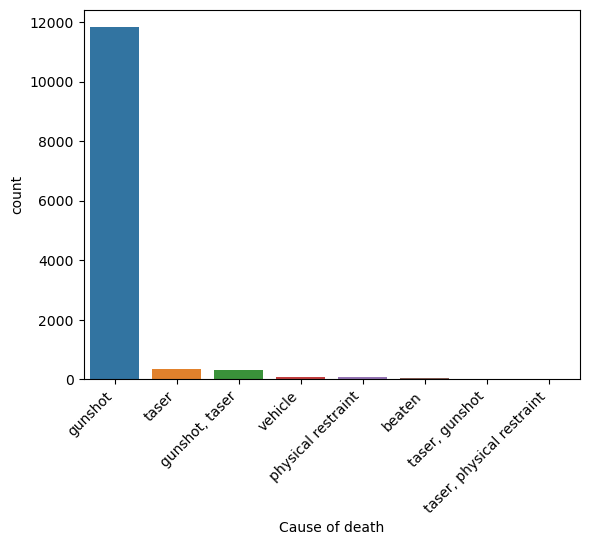

In [48]:
sns.barplot(data = pd_cause_top, x= "Cause of death", y= 'count')
plt.xticks(rotation=45, ha="right")

## there are several that are gunshot related, need to concatinate the numbers and add anything listed as gunshot.

In [49]:
total_cause = pd_cause["count"].sum()
total_cause 

12754

In [50]:
#df.loc[df['B']==3, 'A'].item()
gunshot_count= pd_cause.loc[pd_cause['Cause of death']=='gunshot', 'count'].item()
gunshot_count

11822

In [51]:
gunshot_pct = gunshot_count/total_cause

In [52]:
gunshot_pct.round(2)*100

93.0

In [53]:
pd_cause

,Cause of death,count
6,gunshot,11822
26,taser,342
14,"gunshot, taser",302
34,vehicle,88
22,physical restraint,73
3,beaten,38
30,"taser, gunshot",15
33,"taser, physical restraint",10
0,asphyxiated,9
20,other,8


## as is, with th initial identification, the gunshot percent is 93.  if we added the others, it would be closer to 96

In [54]:
pd_killing_df['Criminal Charges?']= pd_killing_df['Criminal Charges?'].str.lower()

In [55]:
pd_charged =pd_killing_df.groupby('Criminal Charges?')['Criminal Charges?'].value_counts().reset_index(name= 'count').sort_values('count', ascending = False)

In [56]:
pd_charged.head()

,Criminal Charges?,count
50,no known charges,12521
0,charged with a crime,101
7,"charged, acquitted",34
8,"charged, charges dropped",14
9,"charged, convicted",9


In [57]:
##df.loc[df['B']==3, 'A'].item()
uncharged_count = pd_charged.loc[pd_charged['Criminal Charges?'] == 'no known charges', 'count'].item()
uncharged_count

12521

In [58]:
total_charged = pd_charged["count"].sum()
total_charged

12754

In [59]:
uncharged_pct = uncharged_count/total_charged

In [60]:
uncharged_pct.round(2)*100

98.0

## 98% of the officers are not charged criminally over the 10 years of data

In [61]:
pd_killing_2023['Criminal Charges?']= pd_killing_2023['Criminal Charges?'].str.lower()

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_2992\621858423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_killing_2023['Criminal Charges?']= pd_killing_2023['Criminal Charges?'].str.lower()


In [62]:
pd_charged_2023 = pd_killing_2023.groupby('Criminal Charges?')['Criminal Charges?'].value_counts().reset_index(name= 'count').sort_values('count', ascending = False)

In [63]:
pd_charged_2023

,Criminal Charges?,count
2,no known charges,1235
0,charged with a crime,11
1,"charged, charges dropped",1


In [64]:
total_charged_2023 = pd_charged_2023["count"].sum()
total_charged_2023

1247

In [65]:
uncharged_count_2023 = pd_charged_2023.loc[pd_charged_2023['Criminal Charges?'] == 'no known charges', 'count'].item()
uncharged_count_2023

1235

In [66]:
uncharged_pct_2023= uncharged_count_2023/total_charged_2023
uncharged_pct_2023.round(2)*100

99.0

## 1% of cases brought criminal charges in 2023.  that is 10 out of over 1200.

In [67]:
# wego
#     .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
#     .loc[wego['TRIP_ID'] == 345104]
#     [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
# )

pd_killing_df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,date_of_incident,year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Devon Allen,25,Male,Black,NaN,2024-04-30,2024.0,200 W 24th St,New York City,NY,NaN,New York,New York Police Department,NY0303000,gunshot,"25-year-old Devon Allen, was shot at least thr...",Pending investigation,no known charges,https://nypost.com/2024/04/30/us-news/suspect-...,No,Allegedly Armed,gun,other,brandished weapon,Foot,NaN,NaN,NaN,NaN,12968.0,NaN,Person with a Weapon,person with a gun,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Steven McClean,35,Male,Unknown race,NaN,2024-04-30,2024.0,501 King Philip St,Raynham,MA,NaN,Bristol,Raynham Police Department,MA0031400,gunshot,Officers responded to the King Philip Street h...,Pending investigation,no known charges,https://www.necn.com/news/local/raynham-police...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,NaN,NaN,NaN,12969.0,NaN,Other Non-Violent Offense,"disorderly conduct, probation violation",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Jaevel Andrew Boulding,32,Male,Black,https://st1.uvnimg.com/dims4/default/fc163db/2...,2024-04-30,2024.0,1803 Vance Jackson Rd,San Antonio,TX,NaN,Bexar,San Antonio Police Department,TXSPD0000,gunshot,Police said the shooting happened after office...,Pending investigation,no known charges,https://news4sanantonio.com/news/local/identif...,No,Allegedly Armed,gun,attack,used weapon,Not Fleeing,NaN,NaN,NaN,NaN,12975.0,NaN,Part 1 Violent Crime/Domestic Disturbance,"shooting, domestic violence, welfare check",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,James Summers

In [68]:
#df.loc[df.groupby("item")["diff"].idxmin()]
#pd_officers = pd_killing_df.loc[pd_killing_df.groupby('Names of Officers Involved')['year']
pd_officers = pd_killing_df.groupby('year')['Names of Officers Involved'].value_counts().reset_index(name='count')
pd_officers.sort_values('count',  ascending= False)

,year,Names of Officers Involved,count
556,2018.0,Juan David Ortiz,4
557,2018.0,Terry L. Strawn,3
2197,2023.0,Watson Morgan,3
2375,2024.0,Jonathon Matz,3
960,2020.0,Adrian Juarez,2
...,...,...,...
804,2019.0,"Ryan Stubenrauch, Chandler Taylor",1
805,2019.0,Richard Santoro,1
806,2019.0,Perry,1
807,2019.0,Phillip Armentrout,1


In [69]:
juan_df = pd_killing_df.loc[pd_killing_df['Names of Officers Involved']== 'Juan David Ortiz'][['year']]
juan_df

,year
6560,2018.0
6566,2018.0
6570,2018.0
6595,2018.0


In [70]:
terry_df = pd_killing_df.loc[pd_killing_df['Names of Officers Involved']== 'Terry L. Strawn'][['year']]
terry_df

,year
6278,2018.0
6279,2018.0
6280,2018.0


In [71]:
pd_officers.count()

year                          2395
Names of Officers Involved    2395
count                         2395
dtype: int64

In [72]:
pd_officers = pd_officers.dropna(subset=['Names of Officers Involved']).sort_values('count',  ascending= False)

In [73]:
pd_officers_2023 = pd_officers.loc[pd_officers['year']== 2023].sort_values('count', ascending= False)
pd_officers_2023

,year,Names of Officers Involved,count
2197,2023.0,Watson Morgan,3
2256,2023.0,"Samantha Gress, John Hesdon, James Borgia",1
2272,2023.0,"Michael Spicer, Tylor Cespedes, Thomas Ditro",1
2273,2023.0,Michael Tschida,1
2274,2023.0,Michael Zilke,1
...,...,...,...
2350,2023.0,Kyle Golveo,1
2351,2023.0,"Langley, Burns, Schanberger",1
2352,2023.0,"Larry Mears Jr., Scott Hampton",1
2353,2023.0,Lauren Nick,1


## in 2023 there were 178 cases where officers were identified of the 1247 cases for the year. only 14% of the cases identify the officer involved.

In [74]:
178/1247*100

14.274258219727345

In [75]:
#df2.mi.value_counts().loc[lambda x: x>5].reset_index()['index']

pd_officers['Names of Officers Involved'].value_counts()[lambda x: x>1].reset_index()

,Names of Officers Involved,count
0,Kevin Campbell,2
1,Ruben Flores,2
2,Jay Splain,2
3,Robert Sanchez,2
4,Stephen Ramos,2
5,Ryan Vardman,2
6,Michael Tschida,2
7,William Owenby,2
8,Andrew Hall,2
9,Jose Santos,2


## 10 officers had more than one incident of shooting and killing a suspect over the years

In [76]:
pd_killing_df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,date_of_incident,year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Devon Allen,25,Male,Black,NaN,2024-04-30,2024.0,200 W 24th St,New York City,NY,NaN,New York,New York Police Department,NY0303000,gunshot,"25-year-old Devon Allen, was shot at least thr...",Pending investigation,no known charges,https://nypost.com/2024/04/30/us-news/suspect-...,No,Allegedly Armed,gun,other,brandished weapon,Foot,NaN,NaN,NaN,NaN,12968.0,NaN,Person with a Weapon,person with a gun,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Steven McClean,35,Male,Unknown race,NaN,2024-04-30,2024.0,501 King Philip St,Raynham,MA,NaN,Bristol,Raynham Police Department,MA0031400,gunshot,Officers responded to the King Philip Street h...,Pending investigation,no known charges,https://www.necn.com/news/local/raynham-police...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,NaN,NaN,NaN,12969.0,NaN,Other Non-Violent Offense,"disorderly conduct, probation violation",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Jaevel Andrew Boulding,32,Male,Black,https://st1.uvnimg.com/dims4/default/fc163db/2...,2024-04-30,2024.0,1803 Vance Jackson Rd,San Antonio,TX,NaN,Bexar,San Antonio Police Department,TXSPD0000,gunshot,Police said the shooting happened after office...,Pending investigation,no known charges,https://news4sanantonio.com/news/local/identif...,No,Allegedly Armed,gun,attack,used weapon,Not Fleeing,NaN,NaN,NaN,NaN,12975.0,NaN,Part 1 Violent Crime/Domestic Disturbance,"shooting, domestic violence, welfare check",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,James Summers

In [77]:
pd_killing_df['Encounter Type']=pd_killing_df['Encounter Type'].str.lower()
pd_encounters = pd_killing_df.groupby('Encounter Type')['Encounter Type'].value_counts().reset_index(name='count')
pd_encounters.sort_values('count', ascending= False)

,Encounter Type,count
12,part 1 violent crime,2120
10,other non-violent offense,1516
0,domestic disturbance,825
2,mental health/welfare check,810
24,traffic stop,769
5,none/unknown,644
20,person with a weapon,632
14,part 1 violent crime/domestic disturbance,338
6,other crimes against people,310
26,traffic stop/other non-violent offense,158


In [78]:
pd_killing_2023['Encounter Type']= pd_killing_2023['Encounter Type'].str.lower()
pd_encounters_2023 = pd_killing_2023.groupby('Encounter Type')['Encounter Type'].value_counts().reset_index(name='count')

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_2992\486422416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_killing_2023['Encounter Type']= pd_killing_2023['Encounter Type'].str.lower()


In [79]:
pd_encounters_sort = pd_encounters_2023.sort_values('count', ascending= False)
pd_encounters_sort

,Encounter Type,count
9,part 1 violent crime,306
7,other non-violent offense,235
18,traffic stop,108
14,person with a weapon,102
2,mental health/welfare check,96
0,domestic disturbance,80
4,none/unknown,76
5,other crimes against people,59
10,part 1 violent crime/domestic disturbance,44
6,other crimes against people/domestic disturbance,32


In [80]:
for n in pd_encounters_sort.iterrows():
   # if str(n[1]["Encounter Type"]).str.contains('part 1'):
        print(n[1]["Encounter Type"])
  

part 1 violent crime
other non-violent offense
traffic stop
person with a weapon
mental health/welfare check
domestic disturbance
none/unknown
other crimes against people
part 1 violent crime/domestic disturbance
other crimes against people/domestic disturbance
traffic stop/other non-violent offense
part 1 violent crime/traffic stop
person with a weapon/domestic disturbance
person with a weapon/mental health/welfare check
part 1 violent crime/mental health/welfare check
other non-violent offense/traffic stop
person with a weapon/traffic stop
mental health/welfare check/domestic disturbance
domestic disturbance/other non-violent offense
part 1 violent crime/other non-violent offense
traffic stop/mental health/welfare check


In [81]:
label = []
for type, count in zip(pd_encounters_sort['Encounter Type'],pd_encounters_sort['count']):
    if 'part 1' in type:
        pd_encounters_sort.loc[pd_encounters_sort['Encounter Type']== type, 'new_label']= 'Violent'
        #label.append('violent')
    elif'non-violent' in type:
        pd_encounters_sort.loc[pd_encounters_sort['Encounter Type']== type, 'new_label']= 'non-violent'
        #label.append('non-violent')
    elif 'unknown' in type:
        pd_encounters_sort.loc[pd_encounters_sort['Encounter Type']== type, 'new_label']= 'unknown'
        #label.append('unknown')
    elif type=='traffic stop':
        pd_encounters_sort.loc[pd_encounters_sort['Encounter Type']== type, 'new_label']= 'traffic stop'
        #label.append('traffic stop')
    else:
        pd_encounters_sort.loc[pd_encounters_sort['Encounter Type']== type, 'new_label']= type
    
            
        

In [82]:
# df.loc[df["filter_col_name"]== value, 'feature'] =
# pd_encounters_sort.loc[pd_encounters_sort['Encounter Type']== 'traffic stop', 'new_label']= 'test'
# pd_encounters_sort.head()

In [83]:
pd_encounter_type = pd_encounters_sort.groupby("new_label")['count'].sum().reset_index().sort_values('count', ascending = False)
pd_encounter_type

,new_label,count
0,Violent,382
4,non-violent,269
11,traffic stop,108
7,person with a weapon,102
2,mental health/welfare check,96
1,domestic disturbance,80
13,unknown,76
5,other crimes against people,59
6,other crimes against people/domestic disturbance,32
8,person with a weapon/domestic disturbance,20


In [84]:
#df[['A', 'B']] = df['AB'].str.split(' ', n=1, expand=True)
#pd_encounters_2023[['Encounter Type1', 'Encounter Type2']]= pd_encounters_2023['Encounter Type'].str.split( '/', n=1, expand=True)

In [85]:
#pd_encounters_2023

In [86]:
#df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
# cols= ['Encounter Type', 'Encounter Type1', 'Encounter Type2']
# pd_encounter1= pd_encounters_2023['Encounter Type1'].value_counts(sort=True, ascending= False).reset_index()
# pd_encounter1

In [87]:
# pd_encounter2 = pd_encounters_2023['Encounter Type2'].value_counts(sort=True, ascending= False).reset_index()
# pd_encounter2

In [88]:
pd_encounters_2023['Encounter Type'].value_counts(sort=True, ascending= False).reset_index()

,Encounter Type,count
0,domestic disturbance,1
1,part 1 violent crime/mental health/welfare check,1
2,traffic stop/mental health/welfare check,1
3,traffic stop,1
4,person with a weapon/traffic stop,1
5,person with a weapon/mental health/welfare check,1
6,person with a weapon/domestic disturbance,1
7,person with a weapon,1
8,part 1 violent crime/traffic stop,1
9,part 1 violent crime/other non-violent offense,1


In [89]:
#pd_encounters_sort.loc[pd_encounters_sort['Encounter Type']!= "part 1 violent crime"].agg('count', 'sum')
total_encounters= pd_encounter_type['count'].sum()
total_encounters

1247

In [90]:
nonviolent_encounters= pd_encounter_type.loc[pd_encounter_type['new_label']!= "Violent"]['count'].sum()
nonviolent_encounters

865

In [91]:
#df.loc[df['a'] == 1, 'b'].sum()
# nonviolent_encounters = pd_encounter_type.loc[pd_encounter_type['new_label']!= "Violent"].sum()
# nonviolent_encounters

In [92]:
pct_nonviolent= nonviolent_encounters/total_encounters*100

In [93]:
pct_nonviolent.round(2)

69.37

## 75% of the police incidents had non-violent causes- when categorized 69.37% were non violent 

In [94]:
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
pd_killing_df.rename(columns = {'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)' : 'Alleged Weapon'}, inplace = True)

In [95]:
pd_killing_2023.rename(columns = {'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)' : 'Alleged Weapon'}, inplace = True)

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_2992\2339889013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_killing_2023.rename(columns = {'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)' : 'Alleged Weapon'}, inplace = True)


In [96]:
#pd_killing_df.groupby('Encounter Type')['Encounter Type'].value_counts().reset_index(name='count')
pd_killing_wpn= pd_killing_2023.groupby('Alleged Weapon')['Alleged Weapon'].value_counts().reset_index(name='count')

In [97]:
pd_killing_wpn_sort= pd_killing_wpn.sort_values('count', ascending = False)
pd_killing_wpn_sort

,Alleged Weapon,count
9,gun,762
15,knife,168
24,no object,94
41,vehicle,58
39,undetermined,57
36,toy weapon,33
40,unknown weapon,14
19,machete,7
2,blunt object,5
14,hatchet,3


In [98]:
for type, count in zip(pd_killing_wpn_sort['Alleged Weapon'],pd_killing_wpn_sort['count']):
    if'undetermined' in type:
        print(type)

undetermined


In [99]:
for type, count in zip(pd_killing_wpn_sort['Alleged Weapon'],pd_killing_wpn_sort['count']):
    if 'gun' in type:
        pd_killing_wpn_sort.loc[pd_killing_wpn_sort['Alleged Weapon']== type, 'new_label']= 'gun'
        #label.append('violent')
    elif'knife' in type or 'sharp' in type:
        pd_killing_wpn_sort.loc[pd_killing_wpn_sort['Alleged Weapon']== type, 'new_label']= 'knife/sharp object'
        #label.append('non-violent')
    elif 'vehicle' in type:
        pd_killing_wpn_sort.loc[pd_killing_wpn_sort['Alleged Weapon']== type, 'new_label']= 'vehicle'
        #label.append('unknown')
    elif 'no object' in type:
        pd_killing_wpn_sort.loc[pd_killing_wpn_sort['Alleged Weapon']== type, 'new_label']= 'unarmed'
        
    elif 'unclear' in type or "undetermined" in type:
         pd_killing_wpn_sort.loc[pd_killing_wpn_sort['Alleged Weapon']== type, 'new_label']= 'undetermined'
        #label.append('traffic stop')
    else:
        pd_killing_wpn_sort.loc[pd_killing_wpn_sort['Alleged Weapon']== type, 'new_label']= 'other object'
    

In [100]:
#Unarmed (95)  Vehicle (59)  Knife/sharp object (199)  Other object (56)  Gun (766)  Undetermined (72)
pd_killing_wpn_sort

,Alleged Weapon,count,new_label
9,gun,762,gun
15,knife,168,knife/sharp object
24,no object,94,unarmed
41,vehicle,58,vehicle
39,undetermined,57,undetermined
36,toy weapon,33,other object
40,unknown weapon,14,other object
19,machete,7,other object
2,blunt object,5,other object
14,hatchet,3,other object


In [101]:
pd_killing_wpn_sort = pd_killing_wpn_sort.groupby("new_label")['count'].sum().reset_index().sort_values('count', ascending = False)


In [102]:
pd_killing_wpn_sort

,new_label,count
0,gun,767
1,knife/sharp object,174
2,other object,96
3,unarmed,94
4,undetermined,58
5,vehicle,58


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'gun'),
  Text(1, 0, 'knife/sharp object'),
  Text(2, 0, 'other object'),
  Text(3, 0, 'unarmed'),
  Text(4, 0, 'undetermined'),
  Text(5, 0, 'vehicle')])

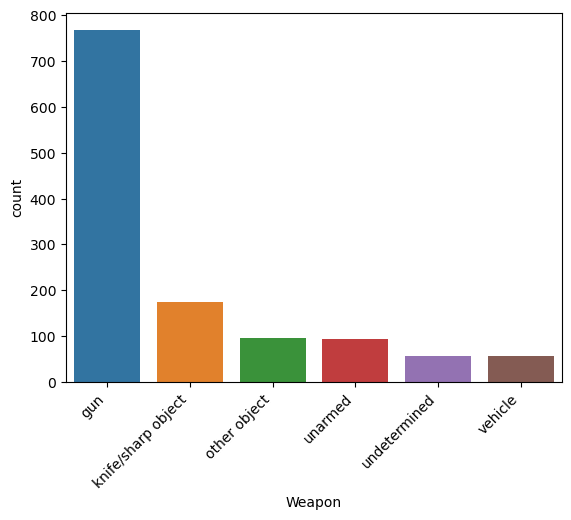

In [103]:
sns.barplot(data = pd_killing_wpn_sort, x= "new_label", y= 'count')
plt.xlabel('Weapon')
plt.xticks(rotation=45, ha="right")

In [104]:
pd_killing_2023.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,date_of_incident,year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon,Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
389,Javier Flores,39,Male,Hispanic,NaN,2023-12-31,2023.0,2800 Taylor Avenue,North Las Vegas,NV,89030.0,Clark,North Las Vegas Police Department,NV0020200,Gunshot,North Las Vegas police responded to reports of...,Pending investigation,no known charges,https://www.8newsnow.com/news/local-news/north...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,Yes,9998.0,NaN,Suburban,12559.0,NaN,person with a weapon,person with a gun,NaN,NaN,NaN,Yes,4100.0,NaN,Large central metro (1),49783.0,36.191622,-115.109872,1787.0,0.033016,0.006715,0.005036,0.000000,0.0,0.049245,0.905988,NV4,Steven Horsford,NaN,Democrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
390,Steven Clark Jr,41,Male,White,NaN,2023-12-31,2023.0,2200 SW 19th Ave Rd,Ocala,FL,34471.0,Marion,Marion County Sheriff's Office,FL0420000,Gunshot,Deputies responded to a call about a man firin...,Pending investigation,no known charges,https://www.ocala.com/story/news/crime/2024/01...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,10054.0,NaN,Urban,12566.0,NaN,part 1 violent crime/domestic disturbance,"shots fired, domestic disturbance",NaN,NaN,NaN,Yes,2401.0,NaN,Medium metro (3),76250.0,29.167623,-82.162277,1259.0,0.522637,0.247021,0.000000,0.089754,0.0,0.011120,0.129468,FL3,Katherine Cammack,NaN,Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
391,Benjamin McDaniel,30,Male,Unknown race,NaN,2023-12-31,2023.0,8801 Baseline Rd,Little Rock,AR,72209.0,Pulaski,Little Rock Police Department,AR0600200,Gunshot,An off-duty officer working as a security guar...,Pending investigation,no known charges,https://www.fox16.com/crime/little-rock-police...,No,Allegedly Armed,knife,attack,used weapon,Not Fleeing,NaN,NaN,off-duty,Suburban,12567.0,NaN,other non-violent offense,shoplifting,Kreshun King Sr,Black,NaN,No,4105.0,NaN,Medium metro (

In [105]:
pd_killing_2023.rename(columns = {'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)' : 'Alleged Weapon'}, inplace = True)

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_2992\2339889013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_killing_2023.rename(columns = {'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)' : 'Alleged Weapon'}, inplace = True)


In [106]:
by_race_unarmed_2023 = pd_killing_2023[['Alleged Weapon', "Victim's race"]]

In [108]:
by_race_unarmed_2023

,Alleged Weapon,Victim's race
389,gun,Hispanic
390,gun,White
391,knife,Unknown race
392,gun,Unknown race
393,no object,White
...,...,...
1631,toy weapon,White
1632,gun,White
1633,knife,White
1634,knife,Unknown race


In [116]:
#("new_label")['count'].sum().reset_index().sort_values('count', ascending = False)
by_race_unarmed_2023_1= by_race_unarmed_2023.groupby("Victim's race")['Alleged Weapon'].value_counts().reset_index(name='count')
by_race_unarmed_2023_2= by_race_unarmed_2023_1.loc[by_race_unarmed_2023_1["Alleged Weapon"] == 'no object'].sort_values("count", ascending = False)

In [117]:
by_race_unarmed_2023_2

,Victim's race,Alleged Weapon,count
67,White,no object,36
6,Black,no object,33
24,Hispanic,no object,19
56,Unknown race,no object,4
44,Native American,no object,1
50,Pacific Islander,no object,1


In [119]:
total_unarmed = by_race_unarmed_2023_2['count'].sum()
total_unarmed

94

In [129]:
by_race_unarmed_2023_2['percent']= by_race_unarmed_2023_2["count"]/total_unarmed*100

In [152]:
by_race_unarmed_2023_2['percent']= by_race_unarmed_2023_2['percent'].round(2)
by_race_unarmed_2023_2

,Victim's race,Alleged Weapon,count,percent
67,White,no object,36,38.30
6,Black,no object,33,35.11
24,Hispanic,no object,19,20.21
56,Unknown race,no object,4,4.26
44,Native American,no object,1,1.06
50,Pacific Islander,no object,1,1.06


## percent by race for 2023 that were unarmed

In [126]:
by_race_pct = by_race_unarmed_2023_2["count"]/total_unarmed 
by_race_pct

67    0.382979
6     0.351064
24    0.202128
56    0.042553
44    0.010638
50    0.010638
Name: count, dtype: float64

In [138]:
pd_killing_2023.rename(columns = {'Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database)' : 'Alleged Threat'}, inplace = True)

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_2992\1946237653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_killing_2023.rename(columns = {'Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database)' : 'Alleged Threat'}, inplace = True)


In [150]:
pd_killing_state.tail()

,State Full,State,Total Population,Black Population,Hispanic Population,Native American Population,Asian Population,Pacific Islander Population,White Population,Other Population,% Black Population,% Victims Black,% Hispanic Population,% Victims Hispanic,% Native Population,% Victims Native American,% Asian Population,% Victims Asian,% Pacific Islander Population,% Victims Pacific Isander,% White Population,% Victims White
49,Wisconsin,WI,5893718.0,366508.0,447290.0,48384.0,174267.0,1892.0,4634018.0,221359.0,0.062186,0.253968,0.075893,0.063492,0.008209,0.031746,0.029568,0.026455,0.000321,0.00000,0.786264,0.550265
50,Wyoming,WY,576851.0,4735.0,59046.0,11781.0,5037.0,489.0,469664.0,26099.0,0.008208,0.051282,0.102359,0.128205,0.020423,0.076923,0.008732,0.000000,0.000848,0.00000,0.814186,0.564103
51,Totals,NaN,331449281.0,39940338.0,62080044.0,2251699.0,19618719.0,622018.0,191697647.0,15238816.0,0.120502,0.254273,0.187299,0.185746,0.006793,0.013878,0.059191,0.018034,0.001877,0.00392,0.578362,0.447859
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Census Data and Mapping Police Violence Data f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
#unarmed and unthreatening
pd_threat_2023 = pd_killing_2023[["Victim's race", 'Alleged Threat', 'Armed/Unarmed Status']]
pd_threat_2023

,Victim's race,Alleged Threat,Armed/Unarmed Status
389,Hispanic,attack,Allegedly Armed
390,White,attack,Allegedly Armed
391,Unknown race,attack,Allegedly Armed
392,Unknown race,attack,Allegedly Armed
393,White,other,Unarmed/Did Not Have Actual Weapon
...,...,...,...
1631,White,other,Unarmed/Did Not Have Actual Weapon
1632,White,attack,Allegedly Armed
1633,White,other,Allegedly Armed
1634,Unknown race,attack,Allegedly Armed


In [166]:
# by_race_unarmed_2023_2= by_race_unarmed_2023_1.loc[by_race_unarmed_2023_1["Alleged Weapon"] == 'no object'].sort_values("count", ascending = False)
pd_threat_by_race = pd_threat_2023.groupby("Victim's race").value_counts().reset_index()
pd_threat_by_race
#['count'].sum().reset_index().sort_values('count', ascending = False)#[pd_threat_2023['Armed/Unarmed Status']!= "Allegedly Armed"], [pd_threat_2023['Alleged Threat'] != "attack"]

,Victim's race,Alleged Threat,Armed/Unarmed Status,count
0,Asian,attack,Allegedly Armed,13
1,Asian,other,Allegedly Armed,5
2,Asian,undetermined,Allegedly Armed,2
3,Asian,undetermined,Unarmed/Did Not Have Actual Weapon,1
4,Asian,attack,Unarmed/Did Not Have Actual Weapon,1
5,Black,attack,Allegedly Armed,168
6,Black,other,Allegedly Armed,54
7,Black,other,Unarmed/Did Not Have Actual Weapon,26
8,Black,other,Vehicle,14
9,Black,attack,Unarmed/Did Not Have Actual Weapon,8


## divide us population by race percentage

In [151]:
total_pop_pct = pd_killing_state[pd_killing_state['State Full']== "Totals"]
total_pop_pct 

,State Full,State,Total Population,Black Population,Hispanic Population,Native American Population,Asian Population,Pacific Islander Population,White Population,Other Population,% Black Population,% Victims Black,% Hispanic Population,% Victims Hispanic,% Native Population,% Victims Native American,% Asian Population,% Victims Asian,% Pacific Islander Population,% Victims Pacific Isander,% White Population,% Victims White
51,Totals,NaN,331449281.0,39940338.0,62080044.0,2251699.0,19618719.0,622018.0,191697647.0,15238816.0,0.120502,0.254273,0.187299,0.185746,0.006793,0.013878,0.059191,0.018034,0.001877,0.00392,0.578362,0.447859


In [141]:
total_pop_2023 = pd_killing_state['2023 ACS Population'].sum()
total_pop_2023 

334914895.0

In [145]:
total_killed_2023 = pd_killing_state['# People Killed 2023'].sum()
total_killed_2023

2494.0

## percent killed by police by race by year

In [167]:
pd_killing_df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,date_of_incident,year,Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,Media description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Armed/Unarmed Status,Alleged Weapon,Alleged Threat Level (Source: WaPo and Review of Cases Not Included in WaPo Database),Threat Level Description,Fleeing (Source: WaPo and Review of Cases Not Included in WaPo Database),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type,Initial Reported Reason for Encounter,Names of Officers Involved,Race of Officers Involved,Known Past Shootings of Officer(s),Call for Service?,Census Tract Code,HUD UPSAI Geography,NCHS Urban-Rural Classification Scheme Codes (https://www.cdc.gov/nchs/data_access/urban_rural.htm),Median household income ACS Census Tract,Latitude,Longitude,Total Population of Census Tract 2019 ACS 5-Year Estimates,White Non-Hispanic Percent of the Population ACS,Black Non-Hispanic Percent of the Population ACS,Native American Percent of the Population ACS,Asian Percent of the Population ACS,Pacific Islander Percent of the Population ACS,Other/Two or More Race Percent of the Population ACS,Hispanic Percent of the Population ACS,Congressional District,Congressional Representative Full Name (https://ballotpedia.org/United_States_House_of_Representatives),Unnamed: 53,Congressional Representative Party (https://ballotpedia.org/United_States_House_of_Representatives),Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Devon Allen,25,Male,Black,NaN,2024-04-30,2024.0,200 W 24th St,New York City,NY,NaN,New York,New York Police Department,NY0303000,gunshot,"25-year-old Devon Allen, was shot at least thr...",Pending investigation,no known charges,https://nypost.com/2024/04/30/us-news/suspect-...,No,Allegedly Armed,gun,other,brandished weapon,Foot,NaN,NaN,NaN,NaN,12968.0,NaN,person with a weapon,person with a gun,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Steven McClean,35,Male,Unknown race,NaN,2024-04-30,2024.0,501 King Philip St,Raynham,MA,NaN,Bristol,Raynham Police Department,MA0031400,gunshot,Officers responded to the King Philip Street h...,Pending investigation,no known charges,https://www.necn.com/news/local/raynham-police...,No,Allegedly Armed,gun,attack,pointed weapon,Not Fleeing,NaN,NaN,NaN,NaN,12969.0,NaN,other non-violent offense,"disorderly conduct, probation violation",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Jaevel Andrew Boulding,32,Male,Black,https://st1.uvnimg.com/dims4/default/fc163db/2...,2024-04-30,2024.0,1803 Vance Jackson Rd,San Antonio,TX,NaN,Bexar,San Antonio Police Department,TXSPD0000,gunshot,Police said the shooting happened after office...,Pending investigation,no known charges,https://news4sanantonio.com/news/local/identif...,No,Allegedly Armed,gun,attack,used weapon,Not Fleeing,NaN,NaN,NaN,NaN,12975.0,NaN,part 1 violent crime/domestic disturbance,"shooting, domestic violence, welfare check",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,James Summers Bennett,45,Male,Native American,https://s3.amazonaws.com/CFSV2/o